In [1]:
# Dependencies
import pandas as pd
import requests
import json
import os
import csv
import prettyprint as pp
import matplotlib.pyplot as plt

# Google developer API key
from config import gkey

In [2]:
world_happiness = "Selected_cities_2020.csv"
location_types = "Location_Types.csv"
world_happiness_df = pd.read_csv(world_happiness, encoding="UTF-8")
location_types_df = pd.read_csv(location_types, encoding="UTF-8")
 # base url
places_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [3]:
location_types = "location_types.csv"
location_types_df = pd.read_csv(location_types, encoding="UTF-8")
location_types_df.head()

,location_types,sub_type
0,library,Education
1,museum,Education
2,primary_school,Education
3,school,Education
4,secondary_school,Education


In [4]:
education_location_types = location_types_df.loc[location_types_df["sub_type"]
                                               =="Education",:]
education_types_list = []
education_location_types.reset_index(inplace=True)
for i in range(len(education_location_types)):
    education_types_list.append(education_location_types.loc[i,"location_types"])

education_types_list

['library',
 'museum',
 'primary_school',
 'school',
 'secondary_school',
 'university']

In [5]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
coord=[]
cities=["Helsinki","Stockholm","Washington D.C.","Brussels","Montevideo","Bucharest","Islamabad","Accra","Bhagdad","Kampala","Gaborone"]
for city in cities:
    params = {"address": city, "key":gkey}
    response = requests.get(base_url, params=params)
    places_data = response.json()   
    lat=places_data["results"][0]["geometry"]["location"]["lat"]
    long=places_data["results"][0]["geometry"]["location"]["lng"]
    coord.append(f"{lat},{long}")
coord

['60.16985569999999,24.9383791',
 '59.32932349999999,18.0685808',
 '38.9071923,-77.0368707',
 '50.8503396,4.3517103',
 '-34.9011127,-56.16453139999999',
 '44.4267674,26.1025384',
 '33.6844202,73.04788479999999',
 '5.6037168,-0.1869644',
 '33.315241,44.3660671',
 '0.3475964,32.5825197',
 '-24.6282079,25.9231471']

In [6]:
# Use for Loop to calculate Libraries

target_type ="library"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_libraries=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_libraries.append(len(places_data["results"]))
    
count_libraries

[19, 15, 20, 20, 2, 16, 2, 1, 8, 2, 1]

In [7]:
# Use for Loop to calculate Museums

target_type ="museum"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_museums=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_museums.append(len(places_data["results"]))

count_museums

[20, 20, 18, 20, 20, 20, 1, 1, 4, 3, 1]

In [8]:
# Use for Loop to calculate Primary Schools

target_type ="primary school"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_primary_schools=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_primary_schools.append(len(places_data["results"]))
   
count_primary_schools

[3, 2, 1, 2, 5, 1, 3, 5, 7, 14, 4]

In [9]:
# Use for Loop to calculate Schools

target_type ="school"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_schools=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_schools.append(len(places_data["results"]))
    
count_schools

[20, 20, 20, 20, 20, 20, 18, 20, 20, 20, 10]

In [11]:
# Use for Loop to calculate Secondary Schools

target_type ="secondary school"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_secondary_schools=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_secondary_schools.append(len(places_data["results"]))
    
count_secondary_schools

[10, 8, 4, 8, 11, 11, 0, 5, 4, 4, 1]

In [12]:
# Use for Loop to calculate Universities

target_type ="university"
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count_universities=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    response = requests.get(base_url, params=params)
    places_data = response.json()
    count_universities.append(len(places_data["results"]))
    
count_universities

[15, 3, 19, 8, 10, 3, 14, 4, 6, 4, 1]

In [14]:
education_dict = {"Cities":cities,"Libraries":count_libraries,"Museums":count_museums,"Primary Schools":count_primary_schools,
              "Secondary Schools":count_secondary_schools,"Schools":count_schools, "Universities":count_universities}

education_data_df = pd.DataFrame(education_dict)
education_data_df

,Cities,Libraries,Museums,Primary Schools,Secondary Schools,Schools,Universities
0,Helsinki,19,20,3,10,20,15
1,Stockholm,15,20,2,8,20,3
2,Washington D.C.,20,18,1,4,20,19
3,Brussels,20,20,2,8,20,8
4,Montevideo,2,20,5,11,20,10
5,Bucharest,16,20,1,11,20,3
6,Islamabad,2,1,3,0,18,14
7,Accra,1,1,5,5,20,4
8,Bhagdad,8,4,7,4,20,6
9,Kampala,2,3,14,4,20,4


In [15]:
#sum the totals of each row
sum_rows= education_data_df.sum(axis=1)

In [16]:
#Add to dataframe
education_data_df["Total"]=sum_rows
education_data_df

,Cities,Libraries,Museums,Primary Schools,Secondary Schools,Schools,Universities,Total
0,Helsinki,19,20,3,10,20,15,87
1,Stockholm,15,20,2,8,20,3,68
2,Washington D.C.,20,18,1,4,20,19,82
3,Brussels,20,20,2,8,20,8,78
4,Montevideo,2,20,5,11,20,10,68
5,Bucharest,16,20,1,11,20,3,71
6,Islamabad,2,1,3,0,18,14,38
7,Accra,1,1,5,5,20,4,36
8,Bhagdad,8,4,7,4,20,6,49
9,Kampala,2,3,14,4,20,4,47


Text(0, 0.5, 'Score')

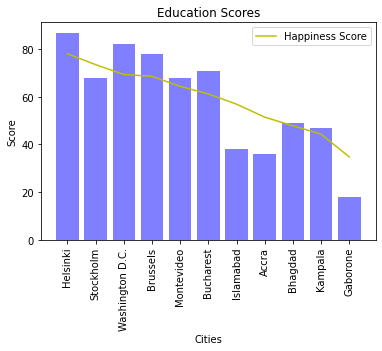

In [17]:
education_score = education_data_df["Total"]
x_cities = education_data_df["Cities"]
life_choices = world_happiness_df["Ladder score"]
plt.bar(x_cities,education_score,color="b",alpha=0.5,align="center")
plt.plot(x_cities,life_choices,color="y",label="Happiness Score")
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Education Scores")
plt.xlabel("Cities")
plt.ylabel("Score")